## Regarding Dataset 
About this Dataset: Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

Description of each column in the dataset:

show_id: A unique identifier for each show or movie.

type: The type of content, either "Movie" or "TV Show."

title: The title of the movie or TV show.

director: The director of the movie or TV show. In the first and third entries, this information is not available (NaN).

cast: The cast or actors in the movie or TV show. In the first entry, this information is not available (NaN). In the second entry, there is a list of actors from the TV show "Blood & Water."

country: The country where the movie or TV show was produced or is associated with.

date_added: The date when the content was added to the streaming platform, in the format "Month Day, Year."

release_year: The year the movie or TV show was originally released.

rating: The content's rating, which indicates the recommended audience age or maturity level (e.g., "PG-13" or "TV-MA").

duration: The duration of the movie or TV show. In the first entry, the duration is given in minutes ("90 min"). In the second and third entries, it's indicated in the number of seasons ("2 Seasons" and "1 Season").

listed_in: The genre or category of the content, which can help classify it (e.g., "Documentaries," "International TV Shows," "Crime TV Shows").

description: A brief description or synopsis of the movie or TV show, providing an overview of the plot or subject matter.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings("ignore")

## Exploring The Dataset

In [2]:
netflix=pd.read_csv("netflix_titles.csv")

In [3]:
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
netflix.shape

(8807, 12)

In [5]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
netflix.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [9]:
netflix.duplicated().sum()

np.int64(0)

## Make a copy of the dataset 

In [10]:
netflix_data=netflix.copy()

In [11]:
netflix_data.shape

(8807, 12)

## Convert Date Time format

In [12]:
# Safely convert 'date_added' to datetime format
netflix_data["date_added"] = pd.to_datetime(
    netflix_data["date_added"], 
    errors="coerce",  # Invalid parsing will result in NaT
    infer_datetime_format=True)  # Automatically infer formats)

# Extract day, month, and year from 'date_added'
netflix_data["day_added"] = netflix_data["date_added"].dt.day
netflix_data["month_added"] = netflix_data["date_added"].dt.month
netflix_data["year_added"] = netflix_data["date_added"].dt.year

# Fill NaN values before converting to integers
netflix_data["day_added"] = netflix_data["day_added"].fillna(0).astype(int)
netflix_data["year_added"] = netflix_data["year_added"].fillna(0).astype(int)

In [13]:
netflix_data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9.0,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9.0,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9.0,2021


## Analyzing the dataset

Netflix Data Null Percentage Analysis

Perform an analysis of null (missing) values in a dataset, specifically a dataset related to Netflix content. the column names and their corresponding null percentages, making it easy to identify which columns have the most missing data

In [14]:
null_counts=netflix_data.isnull().sum()
total_rows=len(netflix_data)
null_percentage = (null_counts / total_rows) * 100
null_percentage_df = pd.DataFrame({'Column Name': null_percentage.index, 'Null Percentage': null_percentage.values})
null_percentage_df = null_percentage_df.sort_values(by='Null Percentage', ascending=False)
null_percentage_df.reset_index(drop=True, inplace=True)
print(null_percentage_df)

     Column Name  Null Percentage
0       director        29.908028
1        country         9.435676
2           cast         9.367549
3     date_added         1.112751
4    month_added         1.112751
5         rating         0.045418
6       duration         0.034064
7           type         0.000000
8        show_id         0.000000
9          title         0.000000
10  release_year         0.000000
11     listed_in         0.000000
12   description         0.000000
13     day_added         0.000000
14    year_added         0.000000


The high percentage of missing data in the "director" and "cast" columns may impact certain analyses or recommendations that rely on this information. Depending on the specific goals of the analysis, it may be necessary to address these missing values through data imputation or to focus on aspects of the dataset that are more complete.

Imputation of Missing Values in Netflix Dataset

Missing values in selected columns of the Netflix dataset are imputed with the placeholder value "Unknown." The columns chosen for imputation include 'director,' 'country,' 'cast,' 'rating,' and 'duration.'

In [15]:
columns_to_impute = ['director', 'country', 'cast', 'rating', 'duration']
for column in columns_to_impute:
    netflix_data[column].fillna("Unknown", inplace=True)

In [16]:
netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9.0,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9.0,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9.0,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24,9.0,2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,9.0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",20,11.0,2019
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",1,7.0,2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,1,11.0,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",11,1.0,2020


In [17]:
netflix_data.description[10]

'Sicily boasts a bold "Anti-Mafia" coalition. But what happens when those trying to bring down organized crime are accused of being criminals themselves?'

In [18]:
netflix_data.type

0         Movie
1       TV Show
2       TV Show
3       TV Show
4       TV Show
         ...   
8802      Movie
8803    TV Show
8804      Movie
8805      Movie
8806      Movie
Name: type, Length: 8807, dtype: object

Segmentation of Netflix Dataset into TV Shows and Movies

the Netflix dataset is segmented into two distinct subsets: TV Shows and Movies. This segmentation is based on the 'type' column, which indicates whether a given entry is a "TV Show" or a "Movie."

In [19]:
tv_show = netflix_data[netflix_data['type']== 'TV Show']
movie = netflix_data[netflix_data['type']== 'Movie']

In [20]:
display(movie.head(4), '-------------------------------------------------------------------------------------------------------------------')
display(tv_show.head(4))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9.0,2021
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,24,9.0,2021
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",24,9.0,2021
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,24,9.0,2021


'-------------------------------------------------------------------------------------------------------------------'

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9.0,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9.0,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24,9.0,2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,9.0,2021


In [21]:
movies_df = netflix_data[netflix_data['type'] == 'Movie']
oldest_movie = movies_df[movies_df['release_year'] == movies_df['release_year'].min()]
oldest_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
7790,s7791,Movie,Prelude to War,Frank Capra,Unknown,United States,2017-03-31,1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...,31,3.0,2017
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,2017-03-31,1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...,31,3.0,2017


In [22]:
len(netflix_data['listed_in'].unique())

514

## Top 5 Popular Genres

In [23]:
genre_counts = netflix_data['listed_in'].str.split(', ').explode().value_counts()
top_5_genres = genre_counts.head(5)
print("Top 5 most popular genres:-", top_5_genres)

Top 5 most popular genres:- listed_in
International Movies      2752
Dramas                    2427
Comedies                  1674
International TV Shows    1351
Documentaries              869
Name: count, dtype: int64


1.International Movies with 2752 titles.

2.Dramas with 2427 titles.

3.Comedies with 1674 titles.

4.International TV Shows with 1351 titles.

5.Documentaries with 869 titles.


These genres have a significant presence in the Netflix content library, with International Movies being the most prominent, followed by Dramas and Comedies. International TV Shows and Documentaries also have a substantial number of titles available on the platform, making them among the top genres on Netflix.

In [24]:
International_TV_Shows = netflix_data[netflix_data['listed_in'] == 'International TV Shows']

In [25]:
International_TV_Shows.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
6601,s6602,TV Show,Devlok with Devdutt Pattanaik,Unknown,"Rasika Dugal, Devdutt Pattanaik",India,2018-10-15,2017,TV-PG,1 Season,International TV Shows,"Through chats with host Rasika Dugal, mytholog...",15,10.0,2018
6709,s6710,TV Show,Eurovision Song Contest,Unknown,"Bar Refaeli, Erez Tal, Assi Azar, Lucy Ayoub",Unknown,2019-07-23,2019,TV-PG,1 Season,International TV Shows,Singers from all over Europe represent their c...,23,7.0,2019


## Top 5 popular actors

In [26]:
cast_counts = netflix_data['cast'].str.split(', ').explode().value_counts()
top_5_cast = cast_counts.head(5)
print("Top 5 most popular genres:-", top_5_cast)

Top 5 most popular genres:- cast
Unknown             825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
Name: count, dtype: int64


The top 5 most popular actors in the dataset, based on the number of appearances in Netflix content, are as follows:

1.Anupam Kher with 43 appearances.

2.Shah Rukh Khan with 35 appearances.

3.Julie Tejwani with 33 appearances.

4.Naseeruddin Shah with 32 appearances.

These actors have a significant presence in Netflix content, with Anupam Kher being the most prolific with 43 appearances. It's clear that they are well-represented in the platform's offerings, making them prominent figures in the world of Netflix entertainment.

## Recent Movie data 

In [27]:
recent_movie_data = netflix_data[['title', 'type', 'description']].iloc[0]
pd.set_option('display.max_colwidth', None)
print(recent_movie_data)

title                                                                                                                                              Dick Johnson Is Dead
type                                                                                                                                                              Movie
description    As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.
Name: 0, dtype: object


## Visualizing the dataset

Where possible, I used the brand colour of Netflix:

It is using a consistent color palette, so that the reader gives your work credibility. This makes it professional-looking and keeps the reader on board.

That is a simple trick that makes all the difference.

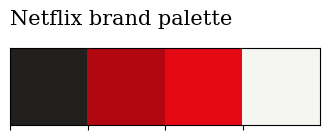

In [28]:
sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])

plt.title("Netflix brand palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

## Netflix through the years

Netflix started as DVD rentals, and now they have an audience of over 150m people - this is their story


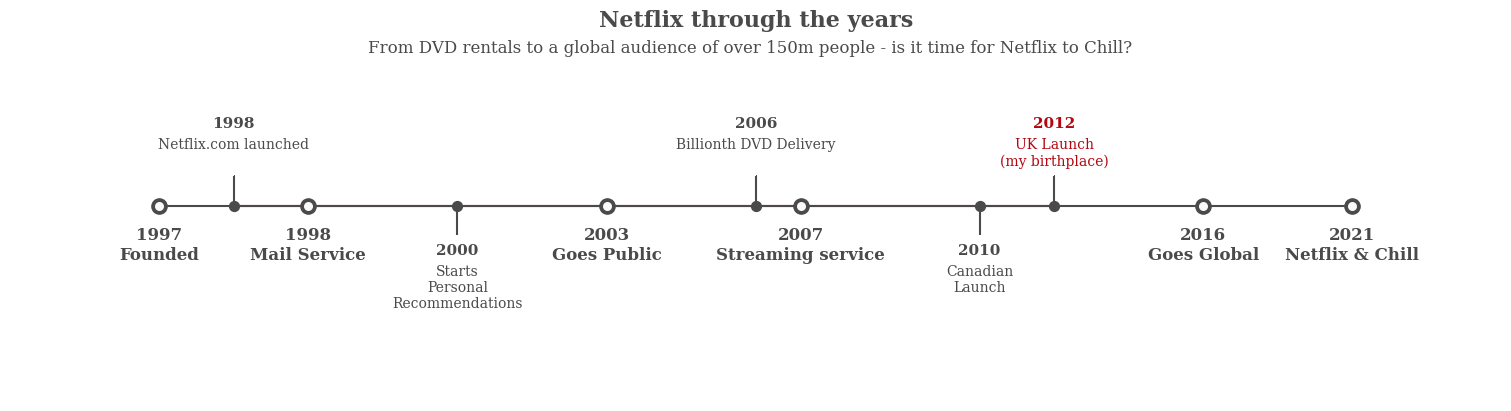

In [29]:

# Timeline data
tl_dates = [
    "1997\nFounded",
    "1998\nMail Service",
    "2003\nGoes Public",
    "2007\nStreaming service",
    "2016\nGoes Global",
    "2021\nNetflix & Chill"
]

tl_x = [1, 2, 4, 5.3, 8, 9]

tl_sub_x = [1.5, 3, 5, 6.5, 7]

tl_sub_times = [
    "1998", "2000", "2006", "2010", "2012"
]

tl_text = [
    "Netflix.com launched",
    "Starts\nPersonal\nRecommendations",
    "Billionth DVD Delivery",
    "Canadian\nLaunch",
    "UK Launch\n(my birthplace)"
]

# Set figure & Axes
fig, ax = plt.subplots(figsize=(15, 4), constrained_layout=True)
ax.set_ylim(-2, 1.75)
ax.set_xlim(0, 10)

# Timeline : line
ax.axhline(0, xmin=0.1, xmax=0.9, c='#4a4a4a', zorder=1)

# Timeline : Date Points
ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='#4a4a4a', zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)

# Timeline : Time Points
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='#4a4a4a', zorder=4)

# Date Text
for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.55, date, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a', fontsize=12)

# Stemplot : vertical line
levels = np.zeros(len(tl_sub_x))    
levels[::2] = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(tl_sub_x, levels)  # Removed use_line_collection=True
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=',', color='#4a4a4a')
plt.setp(stemline, color='#4a4a4a')

# Text
for idx, x, time, txt in zip(range(1, len(tl_sub_x) + 1), tl_sub_x, tl_sub_times, tl_text):
    ax.text(x, 1.3 * (idx % 2) - 0.5, time, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a' if idx != len(tl_sub_x) else '#b20710', fontsize=11)

    ax.text(x, 1.3 * (idx % 2) - 0.6, txt, va='top', ha='center', 
            fontfamily='serif', color='#4a4a4a' if idx != len(tl_sub_x) else '#b20710')

# Spine
for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

# Ticks    
ax.set_xticks([]) 
ax.set_yticks([])

# Title
ax.set_title("Netflix through the years", fontweight="bold", fontfamily='serif', fontsize=16, color='#4a4a4a')
ax.text(2.4, 1.57, "From DVD rentals to a global audience of over 150m people - is it time for Netflix to Chill?", 
        fontfamily='serif', fontsize=12, color='#4a4a4a')

# Show the plot
plt.show()


## Movie and TV shows 

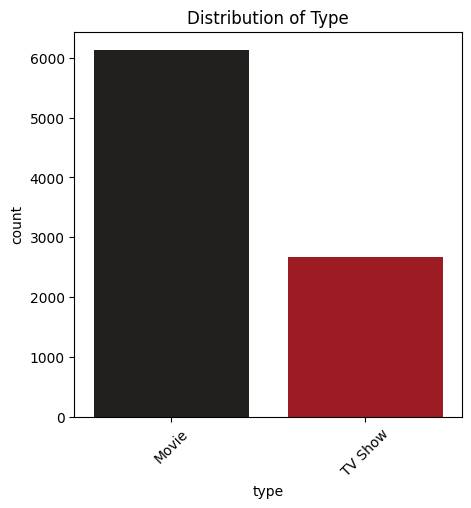

In [30]:
sns.countplot(x='type', data=netflix_data, palette=['#221f1f', '#b20710', '#e50914', '#f5f5f1'])
fig = plt.gcf()
fig.set_size_inches(5, 5)
plt.title('Distribution of Type')
plt.xticks(rotation=45)
plt.show()

 What This Chart Can Reveal:

1.We can use this chart to compare the distribution of different types of content in the Netflix dataset.

2.For example, it will show whether there are more movies or TV shows, or if certain types of content dominate in the dataset.

3.It helps in understanding the content diversity of Netflix based on the dataset you're working with.

## Rating of shows and movies

The count plot of Netflix's rating variable provides an insightful visualization of how different ratings are distributed across the dataset

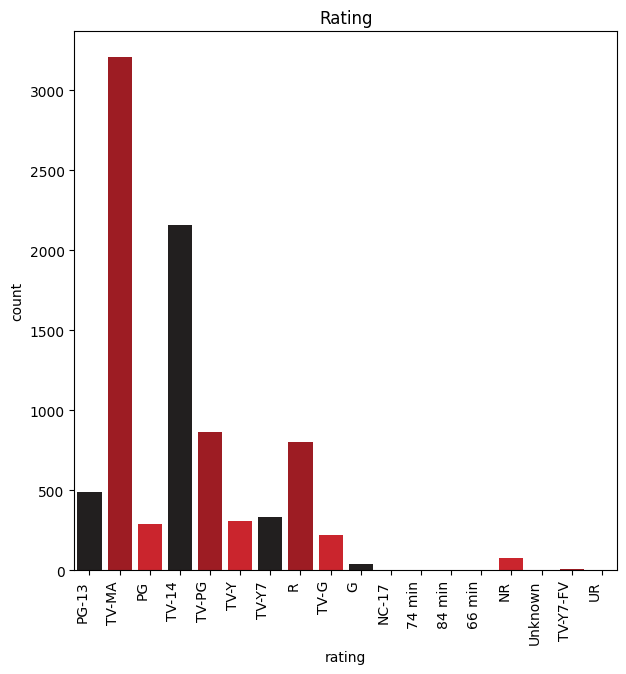

In [31]:
multi_color_palette = ['#221f1f', '#b20710', '#e50914']
sns.countplot(x='rating', data=netflix_data, palette=multi_color_palette)
plt.xticks(rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(7, 7)
plt.title('Rating')
plt.show()

## Pie-chart for the Type: Movie and TV Shows

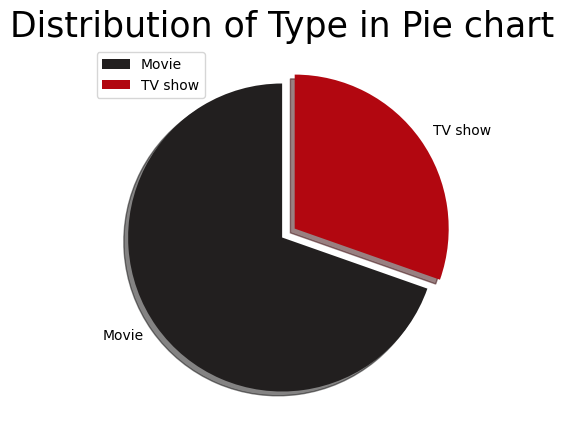

In [32]:
labels = ['Movie', 'TV show']
size = netflix_data['type'].value_counts()
colors = ['#221f1f', '#b20710']  
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, labels=labels, colors=colors, explode=explode, shadow=True, startangle=90)
plt.title('Distribution of Type in Pie chart', fontsize=25)
plt.legend()
plt.show()

## Pie-chart for the  Rating

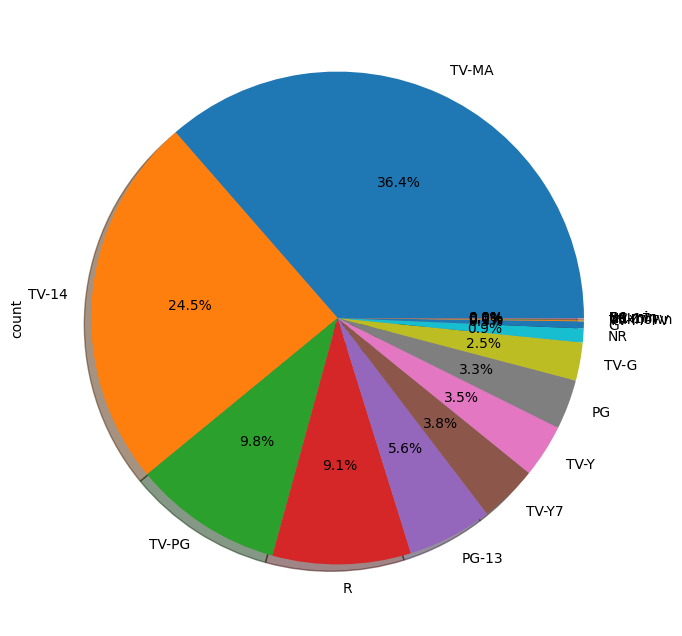

In [33]:
netflix_data['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

## Relation between Type and Rating

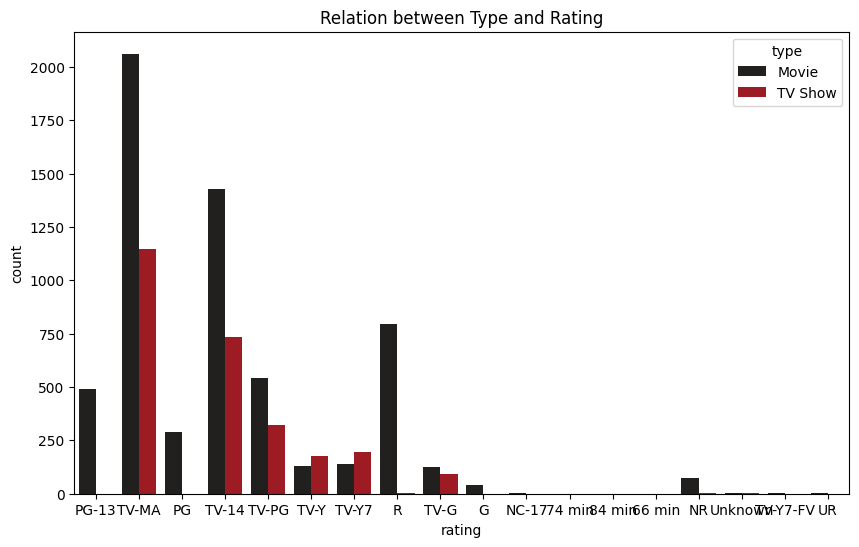

In [34]:
colors = ['#221f1f', '#b20710'] 
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', hue='type', data=netflix_data, palette=colors)
plt.title('Relation between Type and Rating')
plt.show()

## By Country

So we now know there are much more movies than TV shows on Netflix (which surprises me!).

What about if we look at content by country?

I would imagine that the USA will have the most content. I wonder how my country, the UK, will compare?

In [35]:
netflix_data['count'] = 1

# Many productions have several countries listed - this will skew our results , we'll grab the first one mentioned

# Lets retrieve just the first country
netflix_data['first_country'] = netflix_data['country'].apply(lambda x: x.split(",")[0])
netflix_data['first_country'].head()

# Rating ages from this notebook: https://www.kaggle.com/andreshg/eda-beginner-to-expert-plotly (thank you!)

ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

netflix_data['target_ages'] = netflix_data['rating'].replace(ratings_ages)
netflix_data['target_ages'].unique()

# Genre

netflix_data['genre'] = netflix_data['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

# Reducing name length

netflix_data['first_country'].replace('United States', 'USA', inplace=True)
netflix_data['first_country'].replace('United Kingdom', 'UK',inplace=True)
netflix_data['first_country'].replace('South Korea', 'S. Korea',inplace=True)

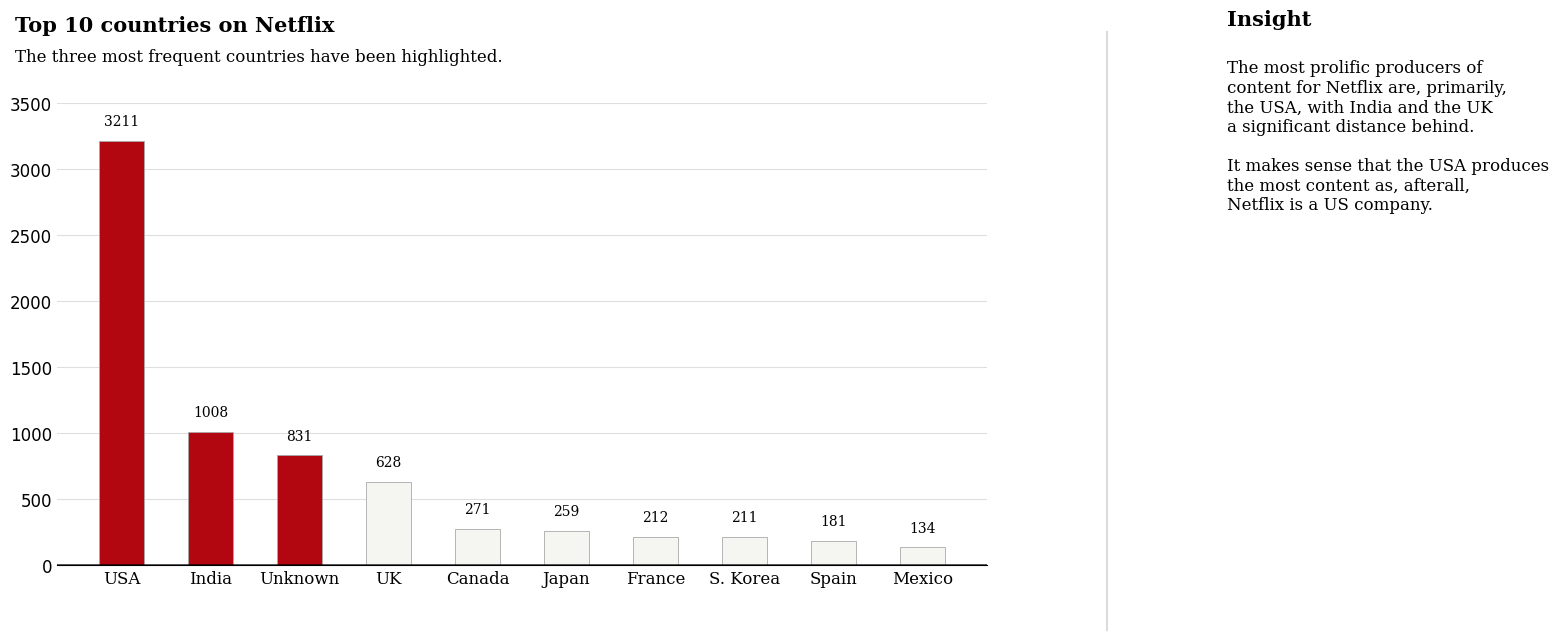

In [36]:
data = netflix_data.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]

# Plot

color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#b20710' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 150), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')



# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)

# Title and sub-title

fig.text(0.09, 1, 'Top 10 countries on Netflix', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'The three most frequent countries have been highlighted.', fontsize=12, fontweight='light', fontfamily='serif')

fig.text(1.1, 1.01, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.67, '''
The most prolific producers of
content for Netflix are, primarily,
the USA, with India and the UK
a significant distance behind.

It makes sense that the USA produces 
the most content as, afterall, 
Netflix is a US company.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 4000, 500) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels

#plt.xlabel("Country", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)
#plt.ylabel("Count", fontsize=12, fontweight='light', fontfamily='serif')
 #plt.legend(loc='upper right')
    
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

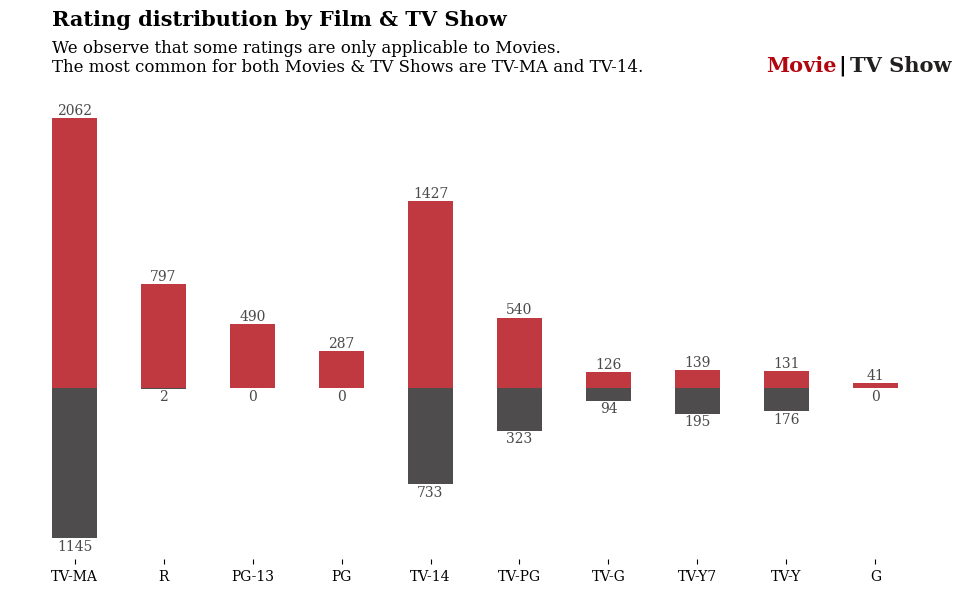

In [37]:
import matplotlib.pyplot as plt

# Define the rating order in descending order
rating_order = ['TV-MA', 'R', 'PG-13', 'PG', 'TV-14', 'TV-PG', 'TV-G', 'TV-Y7', 'TV-Y', 'G']

# Assuming 'netflix_data' is already defined
mf = netflix_data.groupby('type')['rating'].value_counts().unstack().sort_index().fillna(0).astype(int)[rating_order]

movie = mf.loc['Movie']
tv = -mf.loc['TV Show']

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Plot bars for Movies and TV Shows
ax.bar(movie.index, movie, width=0.5, color='#b20710', alpha=0.8, label='Movie')
ax.bar(tv.index, tv, width=0.5, color='#221f1f', alpha=0.8, label='TV Show')

# Annotations
for i in tv.index:
    ax.annotate(f"{-tv[i]}", 
                   xy=(i, tv[i] - 60),
                   va='center', ha='center', fontweight='light', fontfamily='serif',
                   color='#4a4a4a')

for i in movie.index:
    ax.annotate(f"{movie[i]}", 
                   xy=(i, movie[i] + 60),
                   va='center', ha='center', fontweight='light', fontfamily='serif',
                   color='#4a4a4a')

# Remove spines
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

# Customize ticks
ax.set_xticklabels(mf.columns, fontfamily='serif')
ax.set_yticks([])

# Hide legend
ax.legend().set_visible(False)

# Title and explanatory text
fig.text(0.16, 1, 'Rating distribution by Film & TV Show', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.16, 0.89, 
'''We observe that some ratings are only applicable to Movies. 
The most common for both Movies & TV Shows are TV-MA and TV-14.
''', fontsize=12, fontweight='light', fontfamily='serif')

# Labels for Movie and TV Show
fig.text(0.755, 0.924, "Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.815, 0.924, "|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.825, 0.924, "TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

# Show the plot
plt.show()


************************************************
 listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
                                                   ... 
Action & Adventure, Cult Movies                       1
Action & Adventure, Comedies, Music & Musicals        1
Classic Movies, Horror Movies, Thrillers              1
Children & Family Movies, Classic Movies, Dramas      1
Cult Movies, Dramas, Thrillers                        1
Name: count, Length: 514, dtype: int64 
************************************************


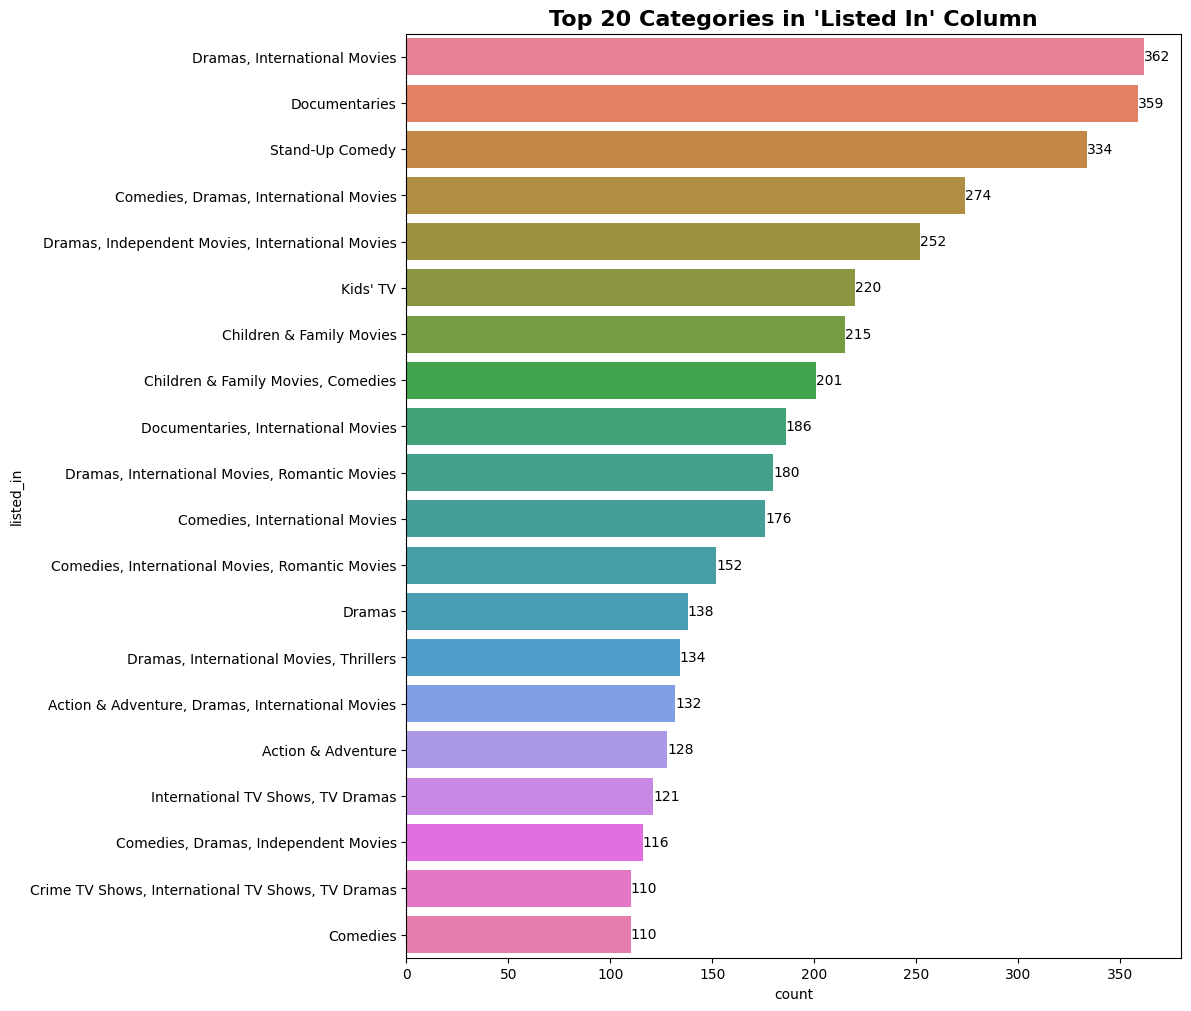

In [38]:

colors = sns.color_palette("husl", len(netflix_data['listed_in'].value_counts().index[0:20]))
s
len_unique_genres = len(netflix_data['listed_in'].unique())
print('************************************************\n', netflix_data['listed_in'].value_counts(), '\n************************************************')
plt.figure(figsize=(10, 12))
ax = sns.countplot(
    data=netflix_data,
    y="listed_in",
    order=netflix_data['listed_in'].value_counts().index[0:20],
    palette=colors)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, color='black')  # 
plt.title("Top 20 Categories in 'Listed In' Column", fontsize=16, fontweight='bold')
plt.show()


## Label Encoding Categorical Columns in Netflix Dataset
Label encoding is a common technique used to convert categorical data into a format suitable for machine learning algorithms. It assigns a unique integer label to each unique category within a column. This encoding simplifies the representation of categorical data and allows it to be used in machine learning models that require numerical input.

In [39]:
str_col = netflix_data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in str_col:
    netflix_data[col] = le.fit_transform(netflix_data[col].astype(str))

In [40]:
netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added,count,first_country,target_ages,genre
0,0,0,1975,2295,7246,603,2021-09-25,2020,7,210,274,2577,25,9.0,2021,1,78,6,309
1,1111,1,1091,4303,409,426,2021-09-24,2021,11,110,414,1762,24,9.0,2021,1,68,3,431
2,2222,1,2651,2105,6296,736,2021-09-24,2021,11,0,242,7341,24,9.0,2021,1,81,3,263
3,3333,1,3506,4303,7246,736,2021-09-24,2021,11,0,297,3617,24,9.0,2021,1,81,3,317
4,4444,1,3861,4303,4815,251,2021-09-24,2021,11,110,393,4416,24,9.0,2021,1,30,3,410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,8671,0,8770,979,4677,603,2019-11-20,2007,8,70,269,895,20,11.0,2019,1,78,3,288
8803,8672,1,8773,4303,7246,736,2019-07-01,2018,14,110,424,8483,1,7.0,2019,1,81,5,0
8804,8673,0,8774,3631,3231,603,2019-11-01,2009,8,206,207,5228,1,11.0,2019,1,78,3,228
8805,8674,0,8777,3247,7061,603,2020-01-11,2006,6,206,125,3315,11,1.0,2020,1,78,5,152


## Data Splitting into Training and Testing Sets
Splitting the dataset into training and testing sets is a fundamental step in machine learning, allowing for the development and evaluation of predictive models.

In [41]:
x=netflix.drop(["type"],axis="columns")
y=netflix[["type"]]

In [42]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)

Random Forest Classifier for Predictive Modeling

In [43]:
# Handle datetime columns
if 'date_added' in netflix_data.columns:
    netflix_data['date_added_year'] = netflix_data['date_added'].dt.year
    netflix_data['date_added_month'] = netflix_data['date_added'].dt.month
    netflix_data['date_added_day'] = netflix_data['date_added'].dt.day
    netflix_data.drop('date_added', axis=1, inplace=True)

In [44]:
label_encoder = LabelEncoder()
for column in netflix_data.columns:
    if netflix_data[column].dtype == 'object':
        netflix_data[column] = label_encoder.fit_transform(netflix_data[column].astype(str))

In [45]:
x = netflix_data.drop(["type"], axis=1)
y = netflix_data["type"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the RandomForestClassifier on the test set: {accuracy:.2f}")

Accuracy of the RandomForestClassifier on the test set: 0.99
